tb - 6/14/2022 - Compare various models in a (complexity,performance) plane and make large figures for the 23rd AMS AOFD (2022)

# Initialization and Figure parameters

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import pandas as pd
import numpy as np
import pickle as pkl
import json

In [2]:
fz = 40
lw = 2
siz = 100

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
mpl.rcParams['lines.linewidth'] = lw
plt.rc('font',size=fz)

In [3]:
Green3_cmap = cm.get_cmap('YlGn', 4)

# Error statistics for various models

## SW radiation

In [4]:
SW = {}

### Empirical parameterization

In [5]:
#SW['emp'] = {}
SW['emp201920'] = {}

In [6]:
# CF['emp']['number_p'] = 3
# CF['emp']['param'] = np.array([0.05213128, 0.00579355, 0.00343533])
# CF['emp']['MSE_train'] = 1064.4172
# CF['emp']['MSE_test'] = 2161.1487


In [7]:
SW['emp201920']['number_p'] = 3
SW['emp201920']['param'] = np.array([0.05319668, 0.00607786, 0.00352458])
SW['emp201920']['MSE_train'] = 1076.68
SW['emp201920']['MSE_test'] = 2412.6987
SW['emp201920']['Sample_train'] = 1929646
SW['emp201920']['Sample_test'] = 260300

### U-net ++

In [8]:
SW['Unet++'] = {}

In [9]:
SW['Unet++']['number_p'] = 14937052

Caveat: This is an estimation of the error based on 200000 samples from each year, noting that the U-net++ was optimized for the heating rates and not the fluxes, so the flux version would likely do better

In [10]:
SW['Unet++']['MSE_train'] = 10.23699176290765
SW['Unet++']['MSE_test'] = 159.293249502594

### Linear models

In [11]:
path_poly_fits = '/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/2021_Ryan_Lagerquist_SW/Polynomial_Fits/'

In [12]:
path_linear = path_poly_fits+'2022_06_14_deg1_cv2'

In [13]:
tmp = pkl.load(open(path_linear,'rb'))

In [14]:
#tmp

In [15]:
for key in tmp.keys():
    ind_space = key.rfind(' ')
    new_key = 'Lin_'+key[ind_space+1:]
    SW[new_key] = {}
    SW[new_key]['MSE_train'] = tmp[key]['MSE_train']
    SW[new_key]['MSE_test'] = tmp[key]['MSE_test']
    SW[new_key]['number_p'] = int(key[ind_space+1:])

### Quadratic models

In [16]:
path_quadratic = path_poly_fits+'2022_06_14_deg2_cv2'
path_quadratic_all = path_poly_fits+'2022_06_14_deg2_all_cv2'

In [17]:
tmp = pkl.load(open(path_quadratic,'rb'))

In [18]:
#tmp

In [19]:
for key in tmp.keys():
    ind_space = key.rfind(' ')
    new_key = 'Quad_'+key[ind_space+1:]
    SW[new_key] = {}
    SW[new_key]['MSE_train'] = tmp[key]['MSE_train']
    SW[new_key]['MSE_test'] = tmp[key]['MSE_test']
    SW[new_key]['number_p'] = int(key[ind_space+1:])

In [20]:
tmp = pkl.load(open(path_quadratic_all,'rb'))

In [21]:
new_key = 'Quad_78'

In [22]:
SW[new_key] = {}
SW[new_key]['MSE_train'] = tmp['MSE_train']
SW[new_key]['MSE_test'] = tmp['MSE_test']
SW[new_key]['number_p'] = 79

### Cubic models

In [23]:
path_cubic = path_poly_fits+'2022_06_14_deg3_cv2'
path_cubic_all = path_poly_fits+'2022_06_14_deg3_all_cv2'

In [24]:
for i in range(7):
    if i==0: dic = {'p RH': -0.4822756120218817, 'LR_Bias': 0.9024607506072879, 'mse_train': 0.019048508576406897, 'mse_test': 0.023078014485909445, 'MSE_train': 4253.850931509128, 'MSE_test': 16946.97581075629}
    elif i==1: dic = {'p RH': -0.38004582817768684, 'albedo^2 p': -0.43955220869825473, 'LR_Bias': 0.9187550574437138, 'mse_train': 0.013977500743757051, 'mse_test': 0.013489997562172791, 'MSE_train': 2163.3306372469074, 'MSE_test': 7289.725072306403}
    elif i==2: dic = {'QLup': -3.587518905192296, 'p RH': -0.3012835287314158, 'albedo^2 p': -0.49961734583205464, 'LR_Bias': 0.9106828305818481, 'mse_train': 0.009741659842438851, 'mse_test': 0.008088753669460836, 'MSE_train': 1335.304195182617, 'MSE_test': 3956.149456598277}
    elif i==3: dic = {'QLup': -3.384120253133853, 'p QLdo': -4.333831885300157, 'p RH': -0.292798980870117, 'albedo^2 p': -0.5090229168821209, 'LR_Bias': 0.9208187224623304, 'mse_train': 0.007403120429805996, 'mse_test': 0.0063799143472923914, 'MSE_train': 1012.9890503784578, 'MSE_test': 2870.290123904773}
    elif i==4: dic = {'cos_za': 0.17245283933152206, 'QLup': -3.3804399966139638, 'p QLdo': -4.329471663763503, 'p RH': -0.3041398120866533, 'albedo^2 p': -0.43368830490818855, 'LR_Bias': 0.8530731187415826, 'mse_train': 0.00575411056942293, 'mse_test': 0.004512980975447759, 'MSE_train': 709.0689576499013, 'MSE_test': 1470.10937856905}
    elif i==5: dic = {'cos_za': 0.17146928047061902, 'QLup': -5.5620419041785585, 'p QLdo': -4.256517177058628, 'p RH': -0.28072064992702717, 'albedo^2 p': -0.445432020642893, 'QLup^2 RH': 10.537654373618613, 'LR_Bias': 0.8505643717706675, 'mse_train': 0.004843531906139132, 'mse_test': 0.0035876120526334852, 'MSE_train': 607.4477449136311, 'MSE_test': 1285.7283375140992}
    elif i==6: dic = {'cos_za': 0.196510896975951, 'QLup': -5.784680125585407, 'p T': -0.20178857630873148, 'p QLdo': -4.411178357488806, 'p RH': -0.14005708774344705, 'albedo^2 p': -0.4606599100538826, 'QLup^2 RH': 11.056780131041556, 'LR_Bias': 0.8675793487831843, 'mse_train': 0.003908292989479232, 'mse_test': 0.0030441254230503846, 'MSE_train': 444.6971678548561, 'MSE_test': 1250.3826502668494}
    
    new_key = 'Cubic_'+str(int(i+1))
    SW[new_key] = {}
    SW[new_key]['MSE_train'] = dic['MSE_train']
    SW[new_key]['MSE_test'] = dic['MSE_test']
    SW[new_key]['number_p'] = i+2

In [25]:
# Features selected by forward sequential selection: ['p RH']
# {'p RH': -0.4822756120218817, 'LR_Bias': 0.9024607506072879, 'mse_train': 0.019048508576406897, 'mse_test': 0.023078014485909445, 'MSE_train': 4253.850931509128, 'MSE_test': 16946.97581075629}
# Features selected by forward sequential selection: ['p RH', 'albedo^2 p']
# {'p RH': -0.38004582817768684, 'albedo^2 p': -0.43955220869825473, 'LR_Bias': 0.9187550574437138, 'mse_train': 0.013977500743757051, 'mse_test': 0.013489997562172791, 'MSE_train': 2163.3306372469074, 'MSE_test': 7289.725072306403}
# Features selected by forward sequential selection: ['QLup', 'p RH', 'albedo^2 p']
# {'QLup': -3.587518905192296, 'p RH': -0.3012835287314158, 'albedo^2 p': -0.49961734583205464, 'LR_Bias': 0.9106828305818481, 'mse_train': 0.009741659842438851, 'mse_test': 0.008088753669460836, 'MSE_train': 1335.304195182617, 'MSE_test': 3956.149456598277}
# Features selected by forward sequential selection: ['QLup', 'p QLdo', 'p RH', 'albedo^2 p']
# {'QLup': -3.384120253133853, 'p QLdo': -4.333831885300157, 'p RH': -0.292798980870117, 'albedo^2 p': -0.5090229168821209, 'LR_Bias': 0.9208187224623304, 'mse_train': 0.007403120429805996, 'mse_test': 0.0063799143472923914, 'MSE_train': 1012.9890503784578, 'MSE_test': 2870.290123904773}
# Features selected by forward sequential selection: ['cos_za', 'QLup', 'p QLdo', 'p RH', 'albedo^2 p']
# {'cos_za': 0.17245283933152206, 'QLup': -3.3804399966139638, 'p QLdo': -4.329471663763503, 'p RH': -0.3041398120866533, 'albedo^2 p': -0.43368830490818855, 'LR_Bias': 0.8530731187415826, 'mse_train': 0.00575411056942293, 'mse_test': 0.004512980975447759, 'MSE_train': 709.0689576499013, 'MSE_test': 1470.10937856905}
# Features selected by forward sequential selection: ['cos_za', 'QLup', 'p QLdo', 'p RH', 'albedo^2 p', 'QLup^2 RH']
# {'cos_za': 0.17146928047061902, 'QLup': -5.5620419041785585, 'p QLdo': -4.256517177058628, 'p RH': -0.28072064992702717, 'albedo^2 p': -0.445432020642893, 'QLup^2 RH': 10.537654373618613, 'LR_Bias': 0.8505643717706675, 'mse_train': 0.004843531906139132, 'mse_test': 0.0035876120526334852, 'MSE_train': 607.4477449136311, 'MSE_test': 1285.7283375140992}
# Features selected by forward sequential selection: ['cos_za', 'QLup', 'p T', 'p QLdo', 'p RH', 'albedo^2 p', 'QLup^2 RH']
# {'cos_za': 0.196510896975951, 'QLup': -5.784680125585407, 'p T': -0.20178857630873148, 'p QLdo': -4.411178357488806, 'p RH': -0.14005708774344705, 'albedo^2 p': -0.4606599100538826, 'QLup^2 RH': 11.056780131041556, 'LR_Bias': 0.8675793487831843, 'mse_train': 0.003908292989479232, 'mse_test': 0.0030441254230503846, 'MSE_train': 444.6971678548561, 'MSE_test': 1250.3826502668494}

In [26]:
tmp = pkl.load(open(path_cubic_all,'rb'))

In [27]:
new_key = 'Cubic_364'

In [28]:
SW[new_key] = {}
SW[new_key]['MSE_train'] = tmp['MSE_train']
SW[new_key]['MSE_test'] = tmp['MSE_test']
SW[new_key]['number_p'] = 365

### GFS dataset

In [29]:
path_Ryan_models = '/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/2022_Ryan_GFS_Dataset/'

In [30]:
Ryan_GFS_models = pd.read_csv(open(path_Ryan_models+'results_summary.csv','rb'),delimiter=', ')

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [31]:
Ryan_GFS_models

,model_type,model_hyperparams,num_model_params,shortwave_surface_down_flux_mae_w_m02,shortwave_surface_down_flux_mse_w2_m04
0,cnn,num-levels=1_num-first-layer-channels=02,12630,8.827321,155.854889
1,cnn,num-levels=1_num-first-layer-channels=04,24228,8.456271,137.143738
2,cnn,num-levels=1_num-first-layer-channels=08,47424,6.869787,95.576981
3,cnn,num-levels=1_num-first-layer-channels=16,93816,7.762746,136.419281
4,cnn,num-levels=1_num-first-layer-channels=32,186600,7.165772,95.851135
...,...,...,...,...,...
104,u_net_plusplus,num-levels=5_num-first-layer-channels=04,260499,7.182575,104.126732
105,u_net_plusplus,num-levels=5_num-first-layer-channels=08,1003478,6.878008,69.628983
106,u_net_plusplus,num-levels=5_num-first-layer-channels=16,3903804,5.710857,51.133381
107,u_net_plusplus,num-levels=5_num-first-layer-channels=32,15271975,6.186837,56.223866


## Cloud fraction

### QUBICC

In [30]:
path_Arthur = '/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/2021_Ryan_Lagerquist_SW/Arthur/'

In [31]:
mse_scores = pkl.load(open(path_Arthur+'mse_scores.pkl','rb'))
no_param = pkl.load(open(path_Arthur+'no_parameters.pkl','rb'))


In [32]:
no_param['sq_man_tun'] = 8 # Because separately calibrated over land and ocean

In [33]:
mse_scores.keys()

dict_keys(['column_NN', 'region_NN', 'cell_NN', 'pol_deg_3', 'pol_deg_3_feat_6', 'pol_deg_2', 'pol_deg_2_feat_5', 'lin_2', 'lin_3', 'lin_4', 'lin_5', 'lin_6', 'lin_7', 'lin_8', 'lin_9', 'lin_10', 'lin_11', 'lin_12', 'lin_13', 'lin_14', 'lin_15', 'lin_16', 'lin_17', 'lin_18', 'sq_man_tun'])

### DYAMOND

In [34]:
dyamond = json.load(open(path_Arthur+'cl_area_pareto_frontier.json','rb'))

In [35]:
dyamond.keys()

dict_keys(['Complexity/Number of parameters', 'MSE scores on validation set'])

In [36]:
dyamond['Complexity/Number of parameters'].keys()

dict_keys(['lin_cl_area_2', 'lin_cl_area_3', 'lin_cl_area_4', 'lin_cl_area_5', 'lin_cl_area_6', 'lin_cl_area_7', 'lin_cl_area_8', 'lin_cl_area_9', 'lin_cl_area_10', 'lin_cl_area_11', 'lin_cl_area_12', 'lin_cl_area_13', 'lin_cl_area_14', 'lin_cl_area_15', 'lin_cl_area_16', 'lin_cl_area_17', 'lin_cl_area_18', 'lin_cl_area_19', 'lin_cl_area_20', 'lin_cl_area_21', 'lin_cl_area_22', 'lin_cl_area_23', 'pol_deg_2_cl_area_1', 'pol_deg_2_cl_area_2', 'pol_deg_2_cl_area_3', 'pol_deg_2_cl_area_4', 'pol_deg_2_cl_area_5', 'pol_deg_2_cl_area_6', 'pol_deg_2_cl_area_7', 'pol_deg_2_cl_area_8', 'pol_deg_2_cl_area_9', 'pol_deg_2_cl_area_10', 'pol_deg_2_cl_area_11', 'pol_deg_2_cl_area_12', 'pol_deg_2_cl_area_13', 'pol_deg_2_cl_area_14', 'pol_deg_2_cl_area_15', 'pol_deg_2_cl_area_16', 'pol_deg_2_cl_area_17', 'pol_deg_2_cl_area_18', 'pol_deg_2_cl_area_19', 'pol_deg_2_cl_area_20', 'pol_deg_2_cl_area_21', 'pol_deg_2_cl_area_22', 'pol_deg_2_cl_area_23', 'pol_deg_2_cl_area_24', 'pol_deg_2_cl_area_25', 'pol_deg_3

### DYAMOND - Dec 2022

In [4]:
path_Arthur22 = '/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/2021_Ryan_Lagerquist_SW/Arthur_data_122022/'

In [5]:
dyamond22 = json.load(open(path_Arthur22+'pareto_frontier/cl_area_pareto_frontier.json'))

In [6]:
dyamond22.keys()

dict_keys(['Complexity/Number of parameters', 'MSE scores on validation set'])

In [7]:
dyamond22['Complexity/Number of parameters'].keys()

dict_keys(['lin_cl_area_1', 'lin_cl_area_2', 'lin_cl_area_3', 'lin_cl_area_4', 'lin_cl_area_5', 'lin_cl_area_6', 'lin_cl_area_7', 'lin_cl_area_8', 'lin_cl_area_9', 'lin_cl_area_10', 'lin_cl_area_11', 'lin_cl_area_12', 'lin_cl_area_13', 'lin_cl_area_14', 'lin_cl_area_15', 'lin_cl_area_16', 'lin_cl_area_17', 'lin_cl_area_18', 'lin_cl_area_19', 'lin_cl_area_20', 'lin_cl_area_21', 'lin_cl_area_22', 'lin_cl_area_23', 'pol_deg_2_cl_area_1', 'pol_deg_2_cl_area_2', 'pol_deg_2_cl_area_3', 'pol_deg_2_cl_area_4', 'pol_deg_2_cl_area_5', 'pol_deg_2_cl_area_6', 'pol_deg_2_cl_area_7', 'pol_deg_2_cl_area_8', 'pol_deg_2_cl_area_9', 'pol_deg_2_cl_area_10', 'pol_deg_2_cl_area_11', 'pol_deg_2_cl_area_12', 'pol_deg_2_cl_area_13', 'pol_deg_2_cl_area_14', 'pol_deg_2_cl_area_15', 'pol_deg_2_cl_area_16', 'pol_deg_2_cl_area_17', 'pol_deg_2_cl_area_18', 'pol_deg_2_cl_area_19', 'pol_deg_2_cl_area_20', 'pol_deg_2_cl_area_21', 'pol_deg_2_cl_area_22', 'pol_deg_2_cl_area_23', 'pol_deg_2_cl_area_24', 'pol_deg_2_cl_are

## Subgrid-scale thermodynamics

In [66]:
ST = {}
ST['LR'] = {}
ST['NN'] = {}
ST['LR_CI'] = {}
ST['NN_CI'] = {}

In [67]:
ST['LR']['number_p'] = 7800
ST['LR']['MSE_train'] = 288
ST['LR']['MSE_test'] = 785
ST['NN']['number_p'] = 122872
ST['NN']['MSE_train'] = 172
ST['NN']['MSE_test'] = 2242
ST['LR_CI']['number_p'] = 7800
ST['LR_CI']['MSE_train'] = 294
ST['LR_CI']['MSE_test'] = 671
ST['NN_CI']['number_p'] = 122872
ST['NN_CI']['MSE_train'] = 169
ST['NN_CI']['MSE_test'] = 425
ST['Sample_train'] = 48e6
ST['Sample_test'] = 48e6

# (Performance,Complexity) Plots

## Cloud fraction with DYAMOND - Dec 2022

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator


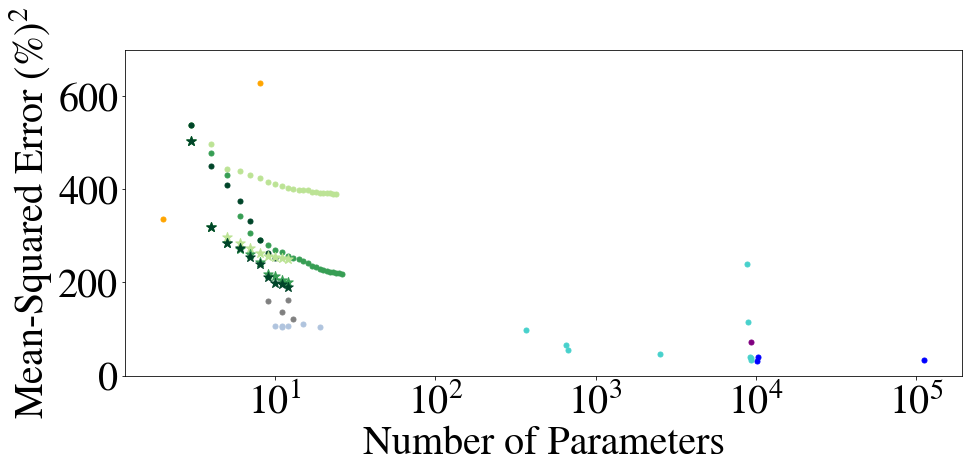

In [24]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

# CS = ax.contour(x_lognparam, y_mse, BIC.T/1e9,zorder=0)
# ax.clabel(CS, inline=True, fontsize=fz/2)

for k in dyamond22['Complexity/Number of parameters'].keys():
    if 'lin_cl_area' in k: col = Green3_cmap(1); m='.'; skip = 0
    elif 'deg_1_no_reg_2' in k: col = Green3_cmap(1); m='*'; skip = 0
    elif 'grid_search' in k: col = 'orange'; skip = 0
    elif 'pol_deg_2' in k: col = Green3_cmap(2); m='.'; skip = 0;
    elif 'deg_2_no_reg_2' in k: col = Green3_cmap(2); m='*'; skip = 0
    elif 'pol_deg_3' in k: col = Green3_cmap(3); m='.'; skip = 0;
    elif 'deg_3_no_reg_2' in k: col = Green3_cmap(3); m='*'; skip = 0
    elif 'cell_NN' in k: col = 'purple'; m='.'; skip = 0
    elif 'seq_feat_sel_NN' in k: col = 'mediumturquoise'; m='.'; skip=0;
    elif 'pysr' in k: col = 'lightsteelblue'; m='.';skip = 0
    elif 'gpgomea' in k: col = 'gray'; m='.'; skip = 0
    else: 
        if 'NN' in k: col = 'b'; m = '.'; skip = 0
        else: skip = 1
    if skip==0:
        ax.scatter(np.log10(dyamond22['Complexity/Number of parameters'][k]),
               dyamond22['MSE scores on validation set'][k],
               s=siz,color=col,zorder=1,marker=m)
plt.ylabel('Mean-Squared Error (%)$^{2}$')
plt.xlabel('Number of Parameters')
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

ax.set_ylim((0,699))

YLIM0 = ax.get_ylim()
XLIM0 = ax.get_xlim()

## Cloud fraction with DYAMOND

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


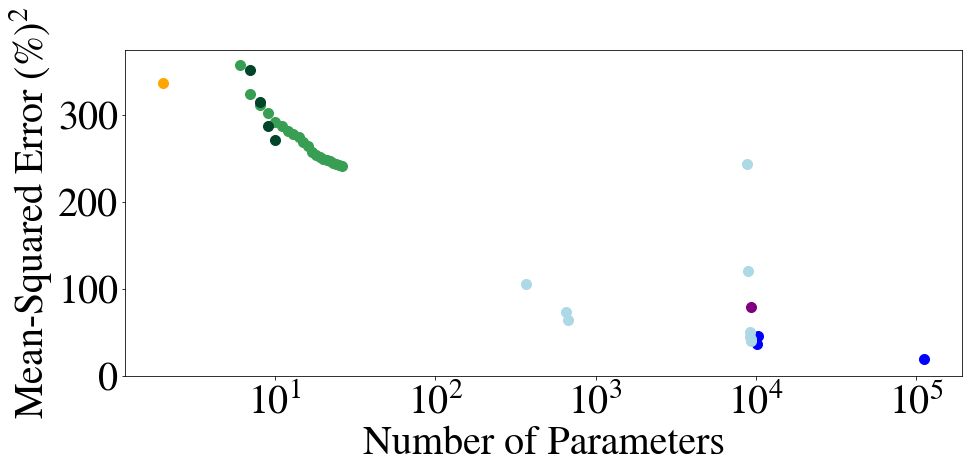

In [37]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

# CS = ax.contour(x_lognparam, y_mse, BIC.T/1e9,zorder=0)
# ax.clabel(CS, inline=True, fontsize=fz/2)

for k in dyamond['Complexity/Number of parameters'].keys():
    if 'lin' in k: col = Green3_cmap(1)
    elif 'grid_search' in k: col = 'orange'
    elif 'pol_deg_2' in k: col = Green3_cmap(2)
    elif 'pol_deg_3' in k: col = Green3_cmap(3)
    elif 'cell_NN' in k: col = 'purple'
    elif 'seq_feat_sel_NN' in k: col = 'lightblue'
    else: col = 'b'
    ax.scatter(np.log10(dyamond['Complexity/Number of parameters'][k]),
               dyamond['MSE scores on validation set'][k],
               s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (%)$^{2}$')
plt.xlabel('Number of Parameters')
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

ax.set_ylim((0,375))

YLIM0 = ax.get_ylim()
XLIM0 = ax.get_xlim()

## Cloud fraction

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


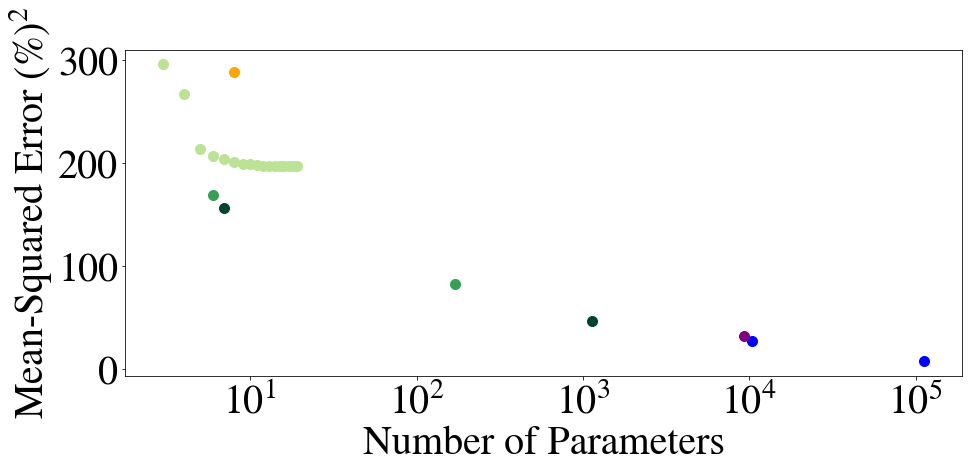

In [50]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

# CS = ax.contour(x_lognparam, y_mse, BIC.T/1e9,zorder=0)
# ax.clabel(CS, inline=True, fontsize=fz/2)

for k in mse_scores.keys():
    if 'lin' in k: col = Green3_cmap(1)
    elif 'sq' in k: col = 'orange'
    elif 'pol_deg_2' in k: col = Green3_cmap(2)
    elif 'pol_deg_3' in k: col = Green3_cmap(3)
    elif 'cell_NN' in k: col = 'purple'
    else: col = 'b'
    ax.scatter(np.log10(no_param[k]),mse_scores[k],s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (%)$^{2}$')
plt.xlabel('Number of Parameters')
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

YLIM0 = ax.get_ylim()
XLIM0 = ax.get_xlim()

In [69]:
mse_scores.keys()

dict_keys(['column_NN', 'region_NN', 'cell_NN', 'pol_deg_3', 'pol_deg_3_feat_6', 'pol_deg_2', 'pol_deg_2_feat_5', 'lin_2', 'lin_3', 'lin_4', 'lin_5', 'lin_6', 'lin_7', 'lin_8', 'lin_9', 'lin_10', 'lin_11', 'lin_12', 'lin_13', 'lin_14', 'lin_15', 'lin_16', 'lin_17', 'lin_18', 'sq_man_tun'])

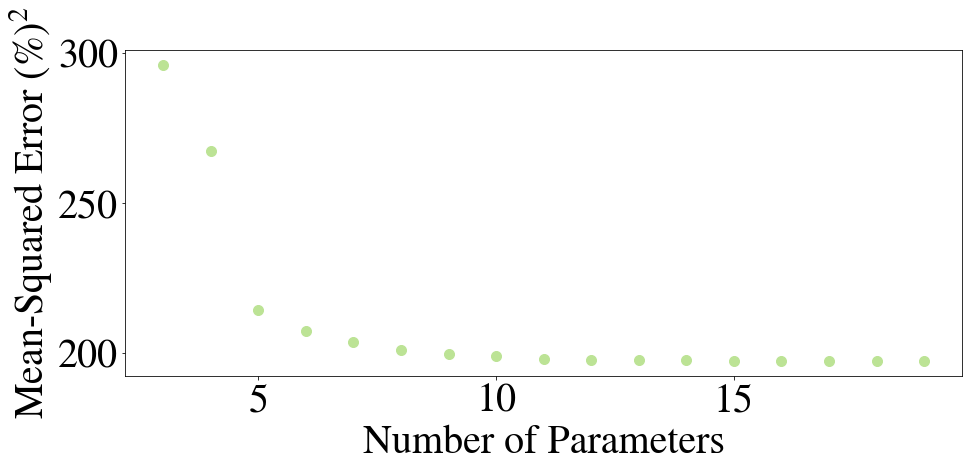

In [98]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

for k in mse_scores.keys():
    if 'lin' in k: 
        col = Green3_cmap(1)
        ax.scatter(no_param[k],mse_scores[k],s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (%)$^{2}$')
plt.xlabel('Number of Parameters')
plt.draw()

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


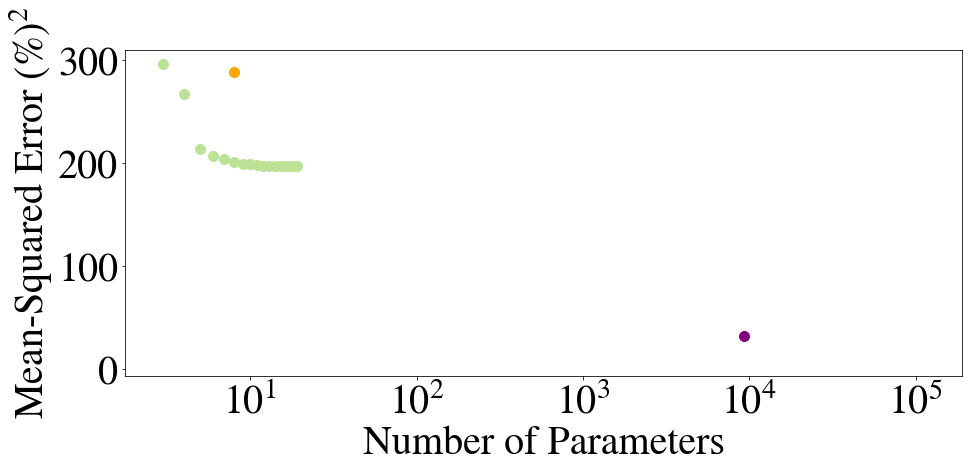

In [99]:
fig, ax = plt.subplots(1,1,figsize=(15,6))



for k in mse_scores.keys():
    plot = True
    if 'lin' in k: col = Green3_cmap(1)
    elif 'sq' in k: col = 'orange'
    elif 'cell_NN' in k: col = 'purple'
    else: plot=False
    if plot: ax.scatter(np.log10(no_param[k]),mse_scores[k],s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (%)$^{2}$')
plt.xlabel('Number of Parameters')
ax.set_ylim(YLIM0); ax.set_xlim(XLIM0)
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);



/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


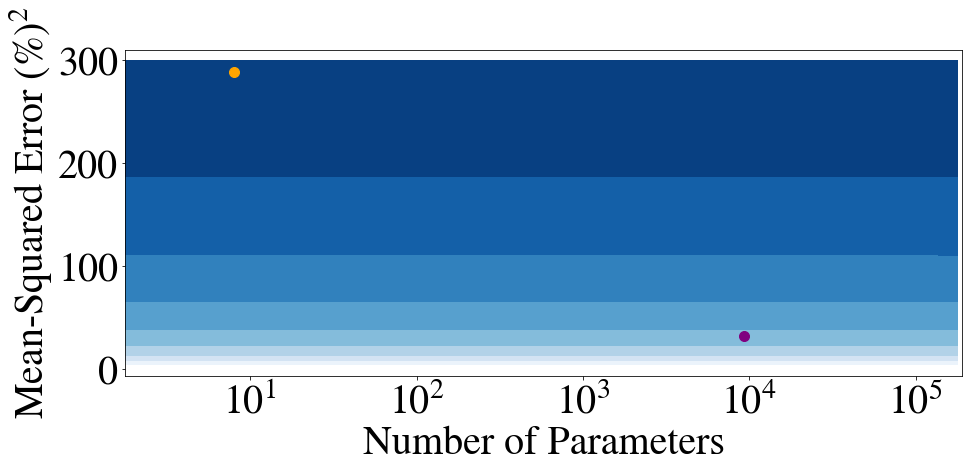

In [96]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

CS = ax.contourf(x_lognparam, y_mse, AIC.T/1e9,zorder=0,cmap='Blues')
# ax.clabel(CS, inline=True, fontsize=fz/2)

for k in ['sq_man_tun','cell_NN']:
    if 'sq' in k: col = 'orange'
    elif 'cell_NN' in k: col = 'purple'
    else: col = 'b'
    ax.scatter(np.log10(no_param[k]),mse_scores[k],s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (%)$^{2}$')
plt.xlabel('Number of Parameters')
ax.set_ylim(YLIM0); ax.set_xlim(XLIM0)
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

AIC = 2k + n$\log10\left(MSE\right)$    
BIC = k $\ln\left(n\right)$ + n$\log10\left(MSE\right)$  

In [77]:
n_samples = 8.8e8

In [78]:
x_lognparam = np.linspace(0,5.25,1000)
y_mse = np.linspace(5,300,200)
AIC = 2*np.outer(10**x_lognparam,y_mse**0)+n_samples*np.outer(x_lognparam**0,np.log10(y_mse))
BIC = np.log(n_samples)*np.outer(10**x_lognparam,y_mse**0)+n_samples*np.outer(x_lognparam**0,np.log10(y_mse))

## SW radiation with GFS

In [61]:
Ryan_GFS_models.keys()

Index(['model_type', 'model_hyperparams', 'num_model_params',
       'shortwave_surface_down_flux_mae_w_m02',
       'shortwave_surface_down_flux_mse_w2_m04'],
      dtype='object')

In [62]:
set(Ryan_GFS_models['model_type'])

{'cnn', 'dense_net', 'linear_regression', 'u_net', 'u_net_plusplus'}

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator


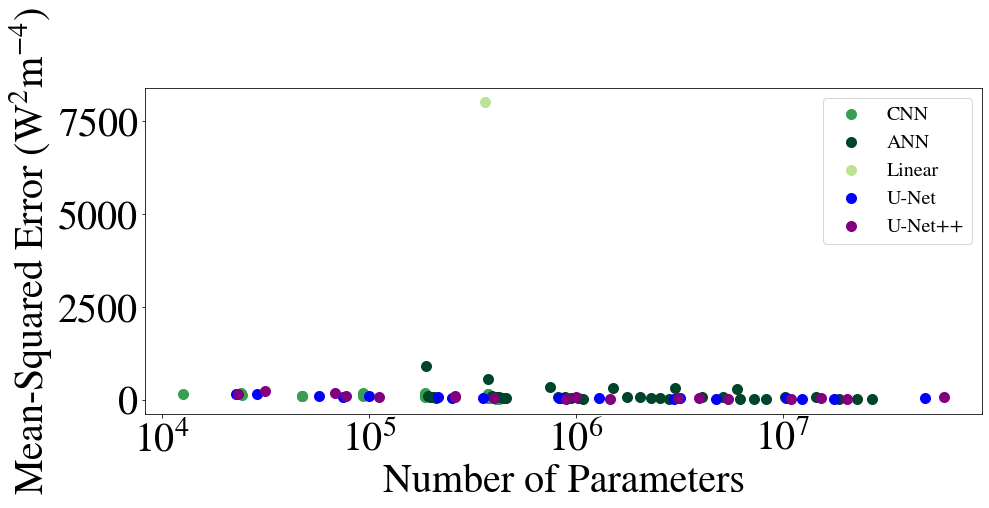

In [85]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

LR_0 = 1; CNN_0 = 1; ANN_0 = 1; UN_0 = 1; UNpp_0 = 1;
for i in range(Ryan_GFS_models.shape[0]):
    plot = True
    if Ryan_GFS_models['model_type'][i]=='linear_regression': 
        col = Green3_cmap(1); 
        if LR_0==1: label = 'Linear'; LR_0 = 0; 
        else: label='';
    elif Ryan_GFS_models['model_type'][i]=='cnn': 
        col = Green3_cmap(2); 
        if CNN_0==1: label = 'CNN'; CNN_0 = 0;
        else: label='';
    elif Ryan_GFS_models['model_type'][i]=='dense_net': 
        col = Green3_cmap(3); 
        if ANN_0==1: label = 'ANN'; ANN_0 = 0;
        else: label='';
    elif Ryan_GFS_models['model_type'][i]=='u_net': 
        col = 'blue'; 
        if UN_0==1: label = 'U-Net'; UN_0 = 0;
        else: label='';
    elif Ryan_GFS_models['model_type'][i]=='u_net_plusplus': 
        col = 'purple'; 
        if UNpp_0==1: label = 'U-Net++'; UNpp_0 = 0;
        else: label='';
    if plot: ax.scatter(np.log10(Ryan_GFS_models['num_model_params'][i]),
                        Ryan_GFS_models['shortwave_surface_down_flux_mse_w2_m04'][i],
                        s=siz,color=col,zorder=1,label=label)
plt.ylabel('Mean-Squared Error (W$^{2}$m$^{-4}$)')
plt.xlabel('Number of Parameters')
plt.draw()
plt.legend(fontsize=fz/2)

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);
#ax.set_ylim((0,180))
YLIM0 = ax.get_ylim()
XLIM0 = ax.get_xlim()

## SW radiation

In [195]:
SW.keys()

dict_keys(['emp201920', 'Unet++', 'Lin_1', 'Lin_2', 'Lin_3', 'Lin_4', 'Lin_5', 'Lin_6', 'Lin_7', 'Lin_8', 'Lin_9', 'Lin_10', 'Quad_1', 'Quad_2', 'Quad_3', 'Quad_4', 'Quad_5', 'Quad_6', 'Quad_7', 'Quad_8', 'Quad_9', 'Quad_78', 'Cubic_1', 'Cubic_2', 'Cubic_3', 'Cubic_4', 'Cubic_5', 'Cubic_6', 'Cubic_7', 'Cubic_364'])

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


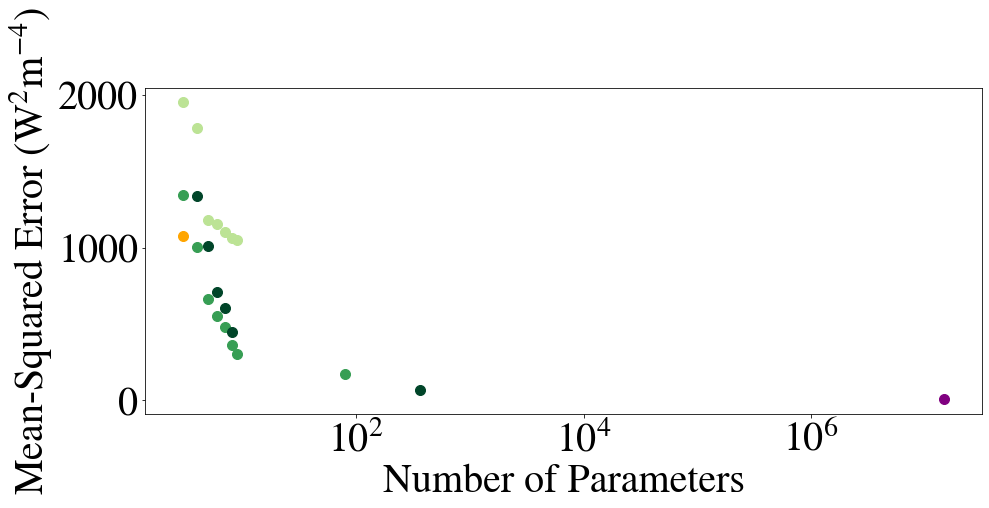

In [208]:
fig, ax = plt.subplots(1,1,figsize=(15,6))


for k in SW.keys():
    plot = True
    if '_1' in k: plot = False
    elif '_2' in k: plot = False
    elif 'Lin' in k: col = Green3_cmap(1)
    elif 'emp' in k: col = 'orange'
    elif 'Quad' in k: col = Green3_cmap(2)
    elif 'Cubic' in k: col = Green3_cmap(3)
    elif 'cell_NN' in k: col = 'purple'
    else: col = 'purple'
    if plot: ax.scatter(np.log10(SW[k]['number_p']),SW[k]['MSE_train'],s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (W$^{2}$m$^{-4}$)')
plt.xlabel('Number of Parameters')
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

YLIM0 = ax.get_ylim()
XLIM0 = ax.get_xlim()

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


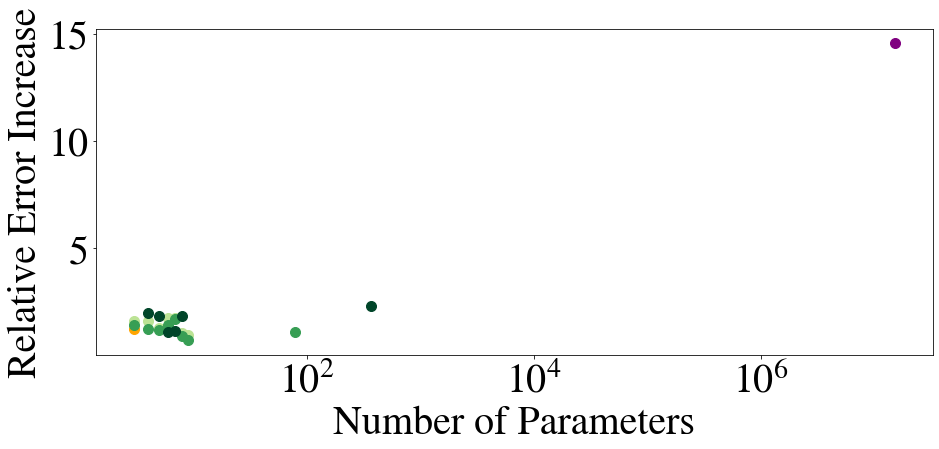

In [230]:
fig, ax = plt.subplots(1,1,figsize=(15,6))


for k in SW.keys():
    plot = True
    if '_1' in k: plot = False
    elif '_2' in k: plot = False
    elif 'Lin' in k: col = Green3_cmap(1); plot = True;
    elif 'emp' in k: col = 'orange'
    elif 'Quad' in k: col = Green3_cmap(2); plot = True; 
    elif 'Cubic' in k: col = Green3_cmap(3); plot = True;
    elif 'cell_NN' in k: col = 'purple'
    else: col = 'purple'
    if plot: 
        ax.scatter(np.log10(SW[k]['number_p']),(SW[k]['MSE_test']-SW[k]['MSE_train'])/SW[k]['MSE_train'],
                   s=siz,color=col,zorder=1)
plt.ylabel('Relative Error Increase')
plt.xlabel('Number of Parameters')
# ax.set_xlim(XLIM0); ax.set_ylim(YLIM0);
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

In [210]:
SW['Lin_5']

{'MSE_train': 1176.7370838317738, 'MSE_test': 2693.293029128334, 'number_p': 5}

## Subgrid-scale thermodynamics

In [100]:
ST

{'LR': {'number_p': 7800, 'MSE_train': 288, 'MSE_test': 785},
 'NN': {'number_p': 122872, 'MSE_train': 172, 'MSE_test': 2242},
 'LR_CI': {'number_p': 7800, 'MSE_train': 294, 'MSE_test': 671},
 'NN_CI': {'number_p': 122872, 'MSE_train': 169, 'MSE_test': 425},
 'Sample_train': 48000000.0,
 'Sample_test': 48000000.0}

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


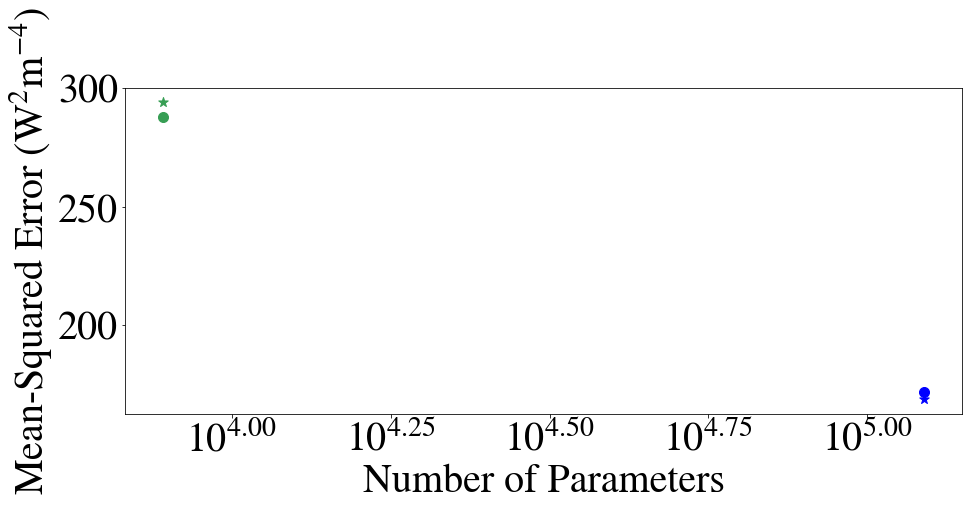

In [115]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

for k in ST.keys():
    plot = True
    if 'LR' in k: col = Green3_cmap(2)
    elif 'NN' in k: col = 'b'
    elif 'Sample' in k: plot=False
    if 'CI' in k: marker = '*'
    else: marker = 'o'
    if plot: ax.scatter(np.log10(ST[k]['number_p']),
               ST[k]['MSE_train'],marker=marker,
               s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (W$^{2}$m$^{-4}$)')
plt.xlabel('Number of Parameters')
plt.draw()
# ax.set_xlim(XLIM0)
# ax.set_ylim(YLIM0)

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

# YLIM0 = ax.get_ylim()
# XLIM0 = ax.get_xlim()

In [116]:
2

2